# Introduction to Python for quantitative finance.


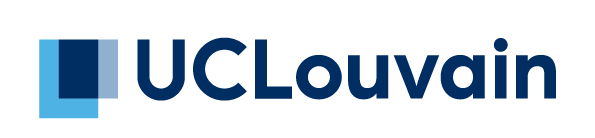



*Author* : Ubeydullah Ozcan (ozcanubey@outlook.com)

# Course 3 - Efficient portfolio

In this course, we will first introduce the Markowitz' model in theoretical/mathematical point of view before going into the computational aspect. 
More theoretical details could be find in [This paper](http://www.its.caltech.edu/~rosentha/courses/BEM103/Readings/JWCh07.pdf)

## 1) Principle
In finance, the Markowitz model ─ put forward by Harry Markowitz in 1952 ─ is a portfolio optimization model; it assists in the selection of the most efficient portfolio by analyzing various possible portfolios of the given securities. Here, by choosing securities that do not 'move' exactly together, the HM model shows investors how to reduce their risk. The HM model is also called mean-variance model due to the fact that it is based on expected returns (mean) and the standard deviation (variance) of the various portfolios. It is foundational to Modern portfolio theory.

## 2) Assumptions
Markowitz made the following assumptions while developing the HM model:

Risk of a portfolio is based on the variability of returns from said portfolio.

 - An investor is risk averse.
 - An investor prefers to increase consumption.
 - The investor's utility function is concave and increasing, due to their risk aversion and consumption preference.
 - An investor either maximizes their portfolio return for a given level of risk or minimizes their risk for a given return.
 - An investor is rational in nature.
 
To choose the best portfolio from a number of possible portfolios, each with different return and risk, two separate decisions are to be made, detailed in the below sections:

 - Determination of a set of efficient portfolios.
 - Selection of the best portfolio out of the efficient set.

## 3) Diverfication : n independent stocks
Let $X_i$ with $i$ in ${1,2, ..., n}$ with $i \in \mathbb{N}$ be a set of independant random variables which represent the returns of a set of $n$ stocks. Let suppose that all the stocks have same expected return and variance : 
$$\mathbb{E}[X_i] = \mu$$ and $$ Var[X_i] = \sigma^2 $$ 

Consider, equal-weighted portofio $P = \frac{1}{n} \sum_{i = 1}^n X_i $. The expectation and variance of EWP are : 
$$ \mu_P = \mathbb{E}[P] = \frac{1}{n}n \mu = \mu $$ and by using independance property $$\sigma_P^2 = Var[P] = \frac{1}{n^2} (n\sigma^2) = \frac{\sigma^2}{n} $$

Question : What is the consequence of having $n \rightarrow \infty$ ? Is it realistic ? What cause it ?

## 4) Diverfication : n correlated stocks

In case of there is correlation between stocks, only the variance of the portfolio will be different :

$$\sigma_P^2 = Var \left(\frac{1}{n}\sum_{i = 1}^n X_i \right) = \frac{\sigma^2}{n}(1+ \rho (n-1)) $$

Now, let's take the limit of this of $n$ tend to $\infty$. The limit will be equal to $\rho$. This conclusion is valid for $\mu_i \neq \mu_j$, $\sigma_i \neq \sigma_j$ and $\rho_{i,j} \neq \rho_{k,l}$

$$\lim_{n \rightarrow \infty}\frac{\sigma^2}{n}(1+ \rho (n-1)) = \lim_{n \rightarrow \infty} \frac{\sigma^2}{n} + \frac{\sigma^2 \rho (n-1)}{n} $$ 
$$ = \lim_{n \rightarrow \infty} \frac{ \rho n }{n} - \frac{\rho}{n} $$
$$ =  \rho $$

In [4]:
def fun(n, rho):
    return (1+rho*(n-1))/n

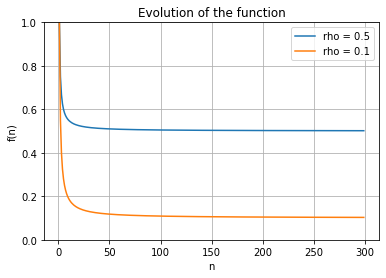

In [3]:
import matplotlib.pyplot as plt
import numpy as np
y = fun(n = np.arange(1,300), rho = 0.5)
y2 = fun(n = np.arange(1,300), rho = 0.1)
x = np.arange(1,300)

fig, ax = plt.subplots()
ax.plot(x, y, label = "rho = 0.5")
ax.plot(x, y2, label = "rho = 0.1")

ax.set(xlabel='n', ylabel='f(n)',
       title='Evolution of the function')
ax.grid()
ax.set_ylim([0, 1])
plt.legend(loc="upper right")
plt.show()

## 5) Definition of optimal portfolio

An optimal portfolio could be define as follow :

   - Maximize $\mu_{P(w)}$ while keeping $\sigma_{P(w)}$ < $\sigma_0$
   - Minimize $\sigma_{P(w)}$ while keeping $\mu_{P(w)}$ > $\mu_0 $
  
To obtain it, let's maximize this quadratic utility function :
$$ w(\gamma) = \underset{w}{argmax} f(w;\gamma) $$
where $f(w;\gamma) := \mu_{P(w)} - \frac{\gamma}{2} \sigma_{P(w)}^2 $

if $\gamma = 0$ : max. expected return = no risk-aversion (risk does not matter).

if $\gamma = \infty$ : min. variance = full-aversion (only risk matters)

### Notation

Portfolio return : weighted sum of the assets' returns
$$P = \sum_{i = 1}^n w_i X_i = w^T X $$

The column vector w is the vector of portfolio weights:

$$   \begin{align}
    w &= \begin{pmatrix}
           w_{1} \\
           w_{2} \\
           \vdots \\
           w_{n}
         \end{pmatrix}
  \end{align} $$ and $$ w^T = (w_1, w_2, ..., w_n) $$
  
The column vector X is the vector of assets' returns:
$$   \begin{align}
    X &= \begin{pmatrix}
           X_{1} \\
           X_{2} \\
           \vdots \\
           X_{n}
         \end{pmatrix}
  \end{align} $$

the weights must sum to 1 : $\sum_{i = 1}^n w_i = 1$


Portfolio's expected return = $\mu_p = w^T \mu$ where $   \begin{align}
    \mu &= \begin{pmatrix}
           \mu_{1} \\
           \mu_{2} \\
           \vdots \\
           \mu_{n}
         \end{pmatrix}
  \end{align} $
  
The normalization constraint on the weights : $\sum_{i = 1}^n w_i = 1 \Leftrightarrow w^T e = 1$ where $e^T = (1, 1, ..., 1)$

The portfolio's variance is :
$$\sigma_{P}^2 = w^T \Sigma  w$$ where $\Sigma$ is the covariance matrix.

### Formulas

#### In absence of risk-free asset
$$w(\gamma) = \frac{1}{\gamma} \Sigma^{-1} (\mu - \lambda(\gamma)e)$$
where $\lambda(\gamma) = \frac{e^T\Sigma^{-1}\mu - \gamma}{e^T \Sigma^{-1}e}$

#### In presence of a risk-free asset
$$w(\gamma) = \frac{1}{\gamma} \Sigma^{-1} (\mu - re)$$

$\mu_p{\gamma} = w^T \mu + (1- w^T e)r$

# Exerice

## 1 - Calculate efficient portfolio for a single risk aversion parameter

You have to create a function which take the following argument :
- Stocks : A vector contains stocks label
- start : starting date
- end : ending date
- gamma : risk-aversion control parameter (single value)
- r : free-risk rate

The goal is to compute :

    1 - The weight to attribute for each assets to create the efficient portfolio for both case with and without risk-free rate
    2 - Calculate the expected return and variance of the portfolio

The function should return weight (w) for both case (with and without free-risk rate) and the portfolio expected return and variance.